# regions and networks

In [154]:
from gradecc.load_data.ts import timeseries
ts = timeseries(subject=2, epoch='baseline')
ts.head()

,7Networks_LH_Vis_1,7Networks_LH_Vis_2,7Networks_LH_Vis_3,7Networks_LH_Vis_4,7Networks_LH_Vis_5,7Networks_LH_Vis_6,7Networks_LH_Vis_7,7Networks_LH_Vis_8,7Networks_LH_Vis_9,7Networks_LH_Vis_10,...,Right VIIIa,Left VIIIb,Vermis VIIIb,Right VIIIb,Left IX,Vermis IX,Right IX,Left X,Vermis X,Right X
3,0.619059,0.212399,-0.397736,-0.019531,-0.375093,-0.260682,0.813853,-0.097351,-0.211968,0.341829,...,0.787102,0.045657,0.692766,0.116574,-0.694965,-0.669235,0.321611,-0.714039,0.645568,-0.548769
4,0.925779,-0.954917,-0.258214,-0.649791,0.379977,-0.625451,-0.145867,0.184408,-0.680507,-0.382208,...,0.128971,0.148791,0.152312,-1.159273,0.528155,0.635899,-1.205409,0.676500,0.085890,0.047503
5,0.626875,-0.989889,-0.161264,-1.004715,0.412673,-0.759415,-0.606122,-0.048508,-0.729473,-0.758798,...,-1.041844,-0.619600,-1.005859,-0.998181,-0.595157,-1.101287,-1.257779,-0.985447,-0.847289,-0.228887
6,0.291048,-0.183669,-0.235433,-0.797872,-0.397722,-0.705493,-0.242141,-0.720461,-0.297353,-0.457756,...,-0.859729,0.554819,-0.492801,1.298689,0.689845,0.005797,-0.190183,0.610956,-0.000497,0.721711
7,0.399648,0.237355,-0.366008,-0.403004,-1.052488,-0.647728,0.201340,-1.234412,0.199633,0.074474,...,0.275050,-1.430377,1.747600,-0.308219,-0.489006,1.022842,0.992858,-0.392210,0.574385,-0.375016


this is how timeseries data looks like. shown first 5 time trials out of 216.

In [155]:
region_names = ts.columns.tolist()
region_names[:5]    # sorted as plot brain needs

['Vermis IX', 'Right IX', 'Left X', 'Vermis X', 'Right X']

In [136]:
len(region_names)

1040

number of regions in cortex and subcortex

In [139]:
import pandas as pd

labels = pd.Series(region_names)
labels = labels.apply(lambda x: x.split(' ')[0]+'SubC' if ' ' in x   # subcortical regions
            else x[10:].split('_')[1]+'Cort')    # cortical regions
labels = labels.rename('label')
assert labels.shape[0] == 1040
print(labels.unique())

['VisCort' 'SomMotCort' 'DorsAttnCort' 'SalVentAttnCort' 'LimbicCort'
 'ContCort' 'DefaultCort' 'LeftSubC' 'RightSubC' 'VermisSubC']


show brain plot for 2 networks

In [144]:
# setup brain plot
from brainspace.datasets import load_conte69
from brainspace.utils.parcellation import map_to_labels
import nibabel
from surfplot import Plot

fname = '/Users/qasem/PycharmProjects/gradients-rl-task/data/Schaefer2018_1000Parcels_7Networks_order.dlabel.nii'
l_hemi, r_hemi = load_conte69()
vertices = nibabel.load(fname).get_fdata()[0]

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


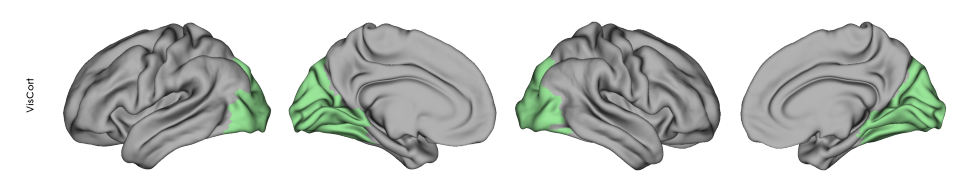

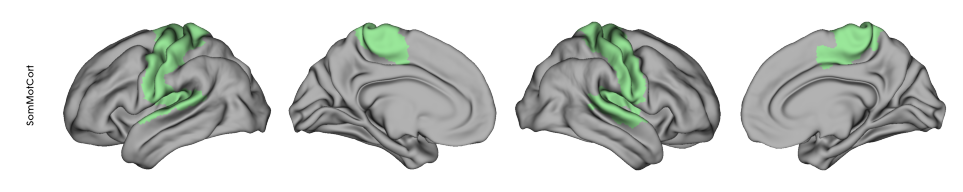

In [245]:
for l in labels.unique()[:2]:
    data = labels == l
    data = map_to_labels(data, vertices, mask=(vertices != 0))
    p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='row', size=(1600, 300), label_text=[l])
    p.add_layer(data, cbar=False, cmap='Accent')
    _ = p.build()

# find ROIs
hand-picked regions of interest based on the figure

![selected ROIs](./ROIs4Qasem.png)

**in progress; ignore**

In [247]:
pd.Series(region_names)[pd.Series(region_names).str.startswith('7Networks_LH_Default')]

374         7Networks_LH_Default_Par_1
375         7Networks_LH_Default_Par_2
376         7Networks_LH_Default_Par_3
377         7Networks_LH_Default_Par_4
378         7Networks_LH_Default_Par_5
                    ...               
495    7Networks_LH_Default_pCunPCC_31
496    7Networks_LH_Default_pCunPCC_32
497         7Networks_LH_Default_PHC_1
498         7Networks_LH_Default_PHC_2
499         7Networks_LH_Default_PHC_3
Length: 126, dtype: object

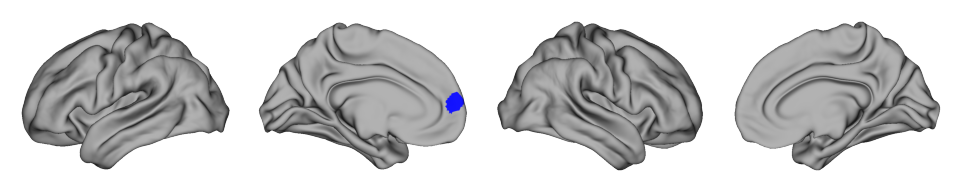

In [231]:
data = pd.Series(region_names).str.startswith('7Networks_LH_Default_PFC_19')
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='row', size=(1600, 300))
p.add_layer(data, cbar=False, cmap='bwr')
_ = p.build()

In [232]:
seeds = ['7Networks_LH_Default_PFC_19', '7Networks_RH_Default_PFCdPFCm_14']
seed = seeds[0]

let's take one as a sample seed ROI

# calculate correlation for one seed
for a seed ROI, calculate connectivity during epochs

In [233]:
EPOCHS = ['baseline', 'early', 'late']
SUBJECTS_INT = [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
                23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 35, 36, 38, 40, 41, 44, 45, 46]
len(SUBJECTS_INT)

38

we are ignoring 'rest' epoch. all calculation on these 38 subjects.

In [234]:
from scipy.stats import pearsonr

list1 = []
for e in EPOCHS:
    list2 = []
    for subj in SUBJECTS_INT:
        ts = timeseries(subj, e)
        seed_ts = ts[seed]
        # we neglect pvalue of whether r is significant
        r = [pearsonr(seed_ts, ts[idx])[0] for idx in ts]   # pearsonr()[0] is rvalue
        r = pd.DataFrame({'r': r}, index=ts.columns)
        r.rename_axis('region', inplace=True)
        r = pd.concat([r], keys=[subj], names=['subject'])
        list2.append(r)
    r = pd.concat(list2, 0)
    r = pd.concat([r], keys=[e], names=['epoch'])   # adds epoch as lower level index
    list1.append(r)

dfr = pd.concat(list1, 0)
dfr = pd.concat([dfr], keys=[seed], names=['seed_region'])

In [243]:
dfr.head()

r
seed_region                 epoch    subject region                      
7Networks_LH_Default_PFC_19 baseline 1       7Networks_LH_Vis_1  0.127065
                                             7Networks_LH_Vis_2 -0.112173
                                             7Networks_LH_Vis_3  0.350969
                                             7Networks_LH_Vis_4  0.098825
                                             7Networks_LH_Vis_5  0.207375

# average over subjects
average seed connectivity over all subjects during each epoch.

In [244]:
dfr_mean = dfr.groupby(level=[0, 1, 3]).mean()
dfr_mean.head()

r
seed_region                 epoch    region                            
7Networks_LH_Default_PFC_19 baseline 7Networks_LH_Cont_Cing_1  0.061146
                                     7Networks_LH_Cont_Cing_2 -0.035186
                                     7Networks_LH_Cont_Cing_3 -0.066176
                                     7Networks_LH_Cont_Cing_4 -0.031134
                                     7Networks_LH_Cont_Cing_5  0.108217

for 'baseline' epoch

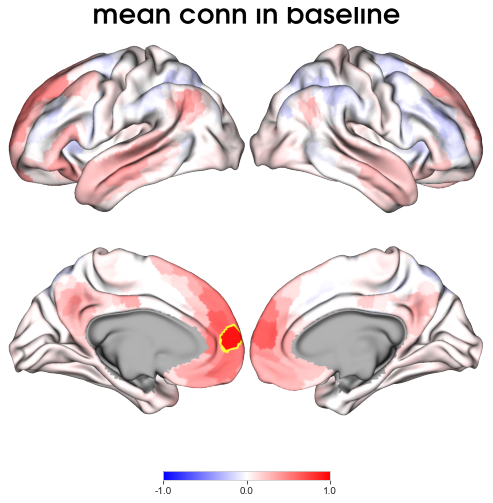

In [238]:
data = dfr_mean.loc[seed, 'baseline']
data = data.loc[pd.Series(region_names)]['r']
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='grid', size=(900, 800),
         label_text={'top': ['mean conn in baseline']})
p.add_layer(data, cbar=True, cmap='bwr', color_range=(-1, 1))
# seed region outlined
data = map_to_labels(pd.Series(region_names)==seed, vertices, mask=(vertices != 0))
p.add_layer(data, cbar=False, as_outline=True)
_ = p.build()

# shift in seed connectivity

In [248]:
import pingouin as pg

dfp = dfr.reset_index([1,2]).groupby(level=[0,1]).apply(pg.pairwise_ttests, dv='r', between='epoch',
                                            subject='subject', padjust='fdr_bh')
dfp.reset_index(level=2, inplace=True)
dfp = dfp.set_index([dfp.index, 'A', 'B']).reorder_levels([0, 2, 3, 1])
dfp[['T', 'p-unc', 'p-corr']].head()

T  \
seed_region                 A        B     region                               
7Networks_LH_Default_PFC_19 baseline early 7Networks_LH_Cont_Cing_1 -1.276783   
                                     late  7Networks_LH_Cont_Cing_1 -0.682928   
                            early    late  7Networks_LH_Cont_Cing_1  0.700850   
                            baseline early 7Networks_LH_Cont_Cing_2 -1.721901   
                                     late  7Networks_LH_Cont_Cing_2  0.487804   

                                                                        p-unc  \
seed_region                 A        B     region                               
7Networks_LH_Default_PFC_19 baseline early 7Networks_LH_Cont_Cing_1  0.205671   
                                     late  7Networks_LH_Cont_Cing_1  0.496785   
                            early    late  7Networks_LH_Cont_Cing_1  0.485595   
                            baseline early 7Networks_LH_Cont_Cing_2  0.089265   
                                     late  7Networks_LH_Cont_Cing_2  0.627131   

                                                                       p-corr  
seed_region                 A        B     region                              
7Networks_LH_Default_PFC_19 baseline early 7Networks_LH_Cont_Cing_1  0.496785  
                                     late  7Networks_LH_Cont_Cing_1  0.496785  
                            early    late  7Networks_LH_Cont_Cing_1  0.496785  
                            baseline early 7Networks_LH_Cont_Cing_2  0.133898  
                                     late  7Networks_LH_Cont_Cing_2  0.627131

In [249]:
dfp.loc[seed, 'baseline', 'early'].head()

,level_2,Contrast,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
region,,,,,,,,,,,,
7Networks_LH_Cont_Cing_1,0,epoch,False,True,-1.276783,74.0,two-sided,0.205671,0.496785,fdr_bh,0.479,-0.289935
7Networks_LH_Cont_Cing_2,0,epoch,False,True,-1.721901,74.0,two-sided,0.089265,0.133898,fdr_bh,0.846,-0.391014
7Networks_LH_Cont_Cing_3,0,epoch,False,True,-2.781747,74.0,two-sided,0.006855,0.013710,fdr_bh,6.137,-0.631687
7Networks_LH_Cont_Cing_4,0,epoch,False,True,-1.594819,74.0,two-sided,0.115015,0.345046,fdr_bh,0.707,-0.362156
7Networks_LH_Cont_Cing_5,0,epoch,False,True,-1.817389,74.0,two-sided,0.073206,0.167423,fdr_bh,0.976,-0.412698


## baseline to ealy
this is how connectivity (pearson corr coef) shift for one seed region outlined in yellow.

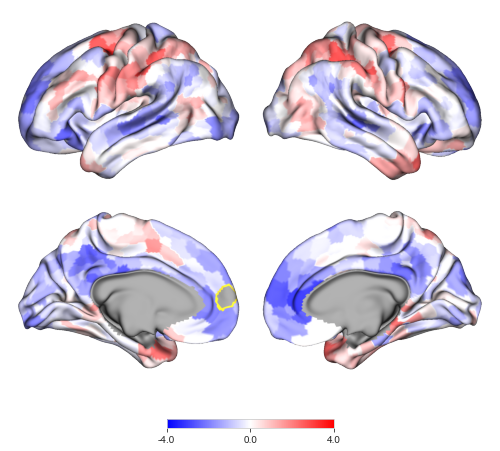

In [241]:
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='grid', size=(900, 700))
# connectivity shift for one seed region
data = dfp.loc[seed, 'baseline', 'early']
data = data.loc[pd.Series(region_names)]['T']
data = map_to_labels(data, vertices, mask=(vertices != 0))
p.add_layer(data, cbar=True, cmap='bwr', color_range=(-4, 4))
# seed region outlined
data = map_to_labels(pd.Series(region_names)==seed, vertices, mask=(vertices != 0))
p.add_layer(data, cbar=False, as_outline=True)
_ = p.build()

## masked with significance
seed region conn shift; baseline to early t-tests; masked with corrected p value

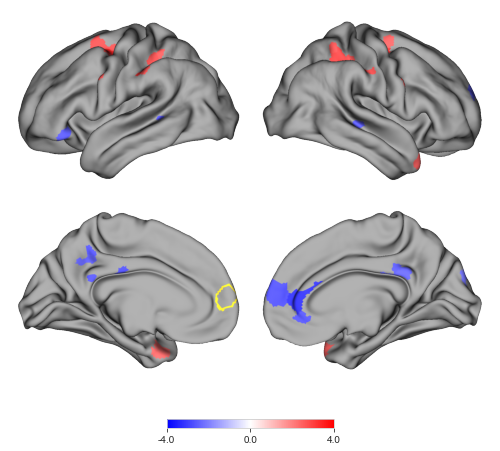

In [242]:
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='grid', size=(900, 700))
# connectivity shift for one seed region
data = dfp.loc[seed, 'baseline', 'early']
data = data.loc[pd.Series(region_names)]
data = data.apply(lambda r: r['T'] if r['p-corr'] < 0.05 else None, axis=1).values
data = map_to_labels(data, vertices, mask=(vertices != 0))
p.add_layer(data, cbar=True, cmap='bwr', color_range=(-4, 4))
# seed region outlined
data = map_to_labels(pd.Series(region_names)==seed, vertices, mask=(vertices != 0))
p.add_layer(data, cbar=False, as_outline=True)
_ = p.build()